In [1]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np
from scipy.signal import freqz
import csv

import pomozne as lib
import filters as fil
import random

# Poskus 2: primerjava testnega signala ENF z dodanim šumom in referenčnim signalom ENF

V poskusu merimo korelacijo testnega signala ENF z dodanim sintetičnim belim Gasussovim šumom in referenčnim signalom ENF. 

V poskusu uporabimo 10 referenčnih posnetkov. Iz vsakega referenčnega posnetka naključno izrežemo 10 odsekov z naključno dolžino (med 10 in 120 sekund) - testni signali.

Za vsak čist testni signal generiramo 10 testnih signalov z dodanim belim Gaussovim šumom. Nad temi signali izvajamo korelacijo z referenčnim signalom.

In [2]:
SAMPLE_RATE = 400

In [3]:
base_path = "./posnetki/poskus2/"

Primerjava različnih sigem, dolžin in filtrov

In [4]:
# csvimport csv

header = [
    "ref_no",
    "t_start_n",
    "t_duration_n",
    "t_start_sec",
    "t_duration_sec",
    "noise",
    "f_lowcut",
    "f_highcut",
    "f_order",
    "max_corr",
    "max_corr_n",
    "max_corr_t",
    "correct_corr",
    "result"
]

file = open('./rezultati/poskus2/res2.csv', 'w', encoding='UTF8', newline='')
writer = csv.writer(file)
writer.writerow(header)

142

1 30 0.01 True


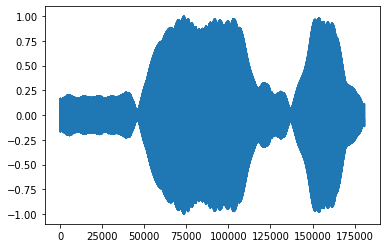

1 30 0.01 4 True


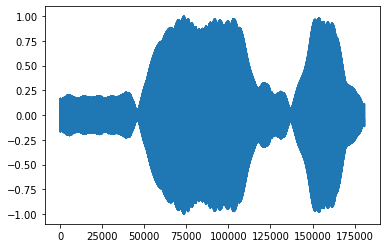

1 30 0.01 6 True


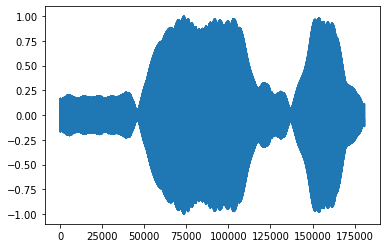

1 30 0.01 8 True
1 30 0.13 True


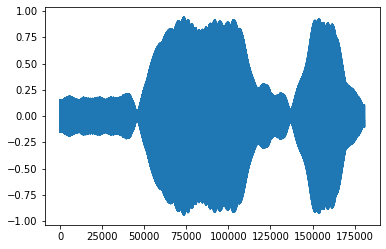

1 30 0.13 4 True


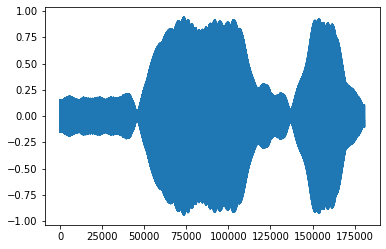

1 30 0.13 6 True


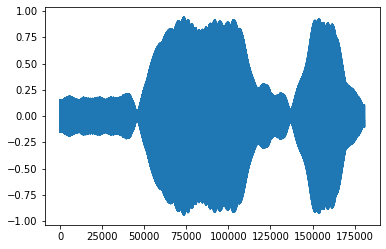

1 30 0.13 8 True
1 30 0.25 False


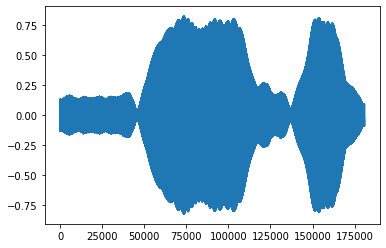

1 30 0.25 4 False


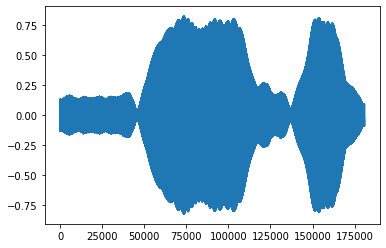

1 30 0.25 6 False


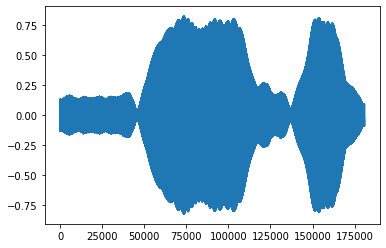

1 30 0.25 8 False
1 60 0.01 True


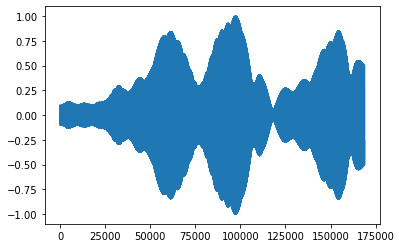

1 60 0.01 4 True


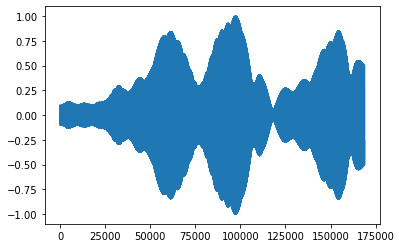

1 60 0.01 6 True


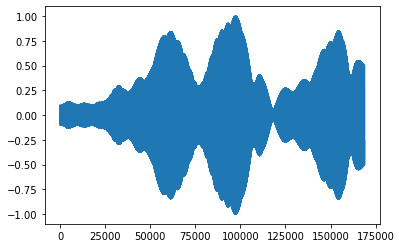

1 60 0.01 8 True
1 60 0.13 False


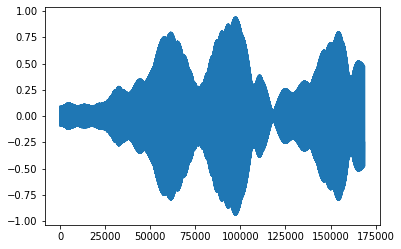

1 60 0.13 4 False


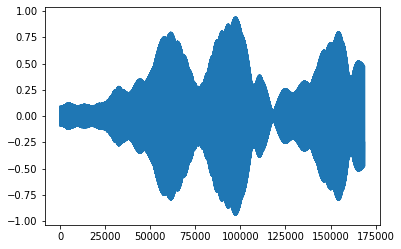

1 60 0.13 6 False


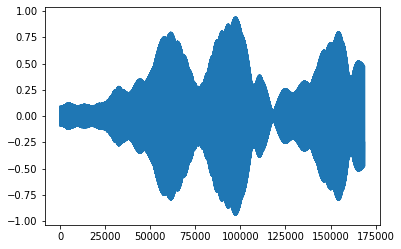

1 60 0.13 8 False
1 60 0.25 True


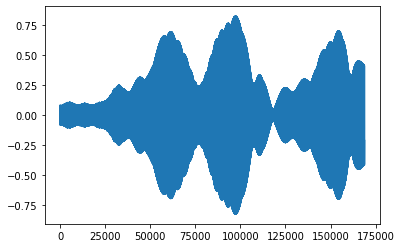

1 60 0.25 4 True


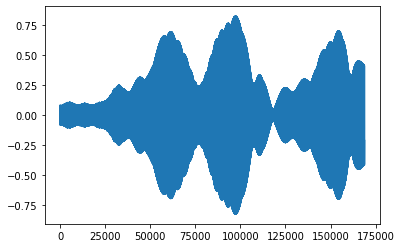

1 60 0.25 6 True


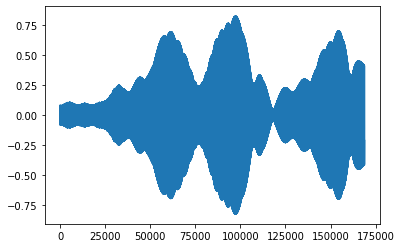

1 60 0.25 8 True
1 90 0.01 True


KeyboardInterrupt: 

In [5]:
for audio_index in range(1, 11):
    audio_ref_path = base_path + "00" + str(audio_index) + "_ref.wav"
    audio_ref, _ = librosa.load(audio_ref_path, sr=SAMPLE_RATE, mono=True)

    for signal_duration in [30, 60, 90]:
        # generating random signal from reference signal
        t_duration_sec = signal_duration
        t_duration_n = t_duration_sec * SAMPLE_RATE

        t_start_n = random.randint(0, (len(audio_ref) - t_duration_n))
        t_start_sec = lib.index_to_seconds(SAMPLE_RATE, audio_ref, t_start_n)

        audio = audio_ref[t_start_n: t_start_n + t_duration_n]

        for noise_sigma in [0.01, 0.13, 0.25]:
            # generating noise
            mu, sigma = 0, noise_sigma
            noise = np.random.normal(mu, sigma, size=len(audio))
            test_signal = audio + noise

            # correlation without filter
            corr = lib.korelacija(audio_ref, test_signal)
            max_value = max(corr)[0]
            max_index = corr.index(max_value)

            cor_time_start = lib.index_to_seconds(
                SAMPLE_RATE, audio_ref, max_index)
            test_passed = t_start_n == max_index

            data = [
                audio_index,
                t_start_n,
                t_duration_n,
                t_start_sec,
                t_start_n,
                sigma,
                None,
                None,
                None,
                max_value,
                max_index,
                cor_time_start,
                corr[t_start_n][0],
                test_passed
            ]
            writer.writerow(data)
            print(audio_index, signal_duration, noise_sigma, str(test_passed))

            for order in [4, 6, 8]:
                filtered_audio = fil.butter_bandpass_filter(
                    test_signal, 48, 52, SAMPLE_RATE, order)

                # correlation with filter
                corr = lib.korelacija(audio_ref, test_signal)
                plt.plot(corr)
                plt.show()
                max_value = max(corr)[0]
                max_index = corr.index(max_value)

                cor_time_start = lib.index_to_seconds(
                    SAMPLE_RATE, audio_ref, max_index)
                test_passed = t_start_n == max_index

                data = [
                    audio_index,
                    t_start_n,
                    t_duration_n,
                    t_start_sec,
                    t_start_n,
                    sigma,
                    48,
                    52,
                    order,
                    max_value,
                    max_index,
                    cor_time_start,
                    corr[t_start_n][0],
                    test_passed
                ]
                writer.writerow(data)
                print(audio_index, signal_duration,
                      noise_sigma, order, test_passed)

            


In [ ]:
file.close()

In [ ]:
# csvimport csv

header = [
    "ref_no",
    "t_start_n",
    "t_duration_n",
    "t_start_sec",
    "t_duration_sec",
    "noise",
    "f_lowcut",
    "f_highcut",
    "f_order",
    "max_corr",
    "max_corr_n",
    "max_corr_t",
    "correct_corr",
    "result"
]

file = open('./rezultati/poskus2/res.csv', 'w', encoding='UTF8', newline='')
writer = csv.writer(file)
writer.writerow(header)


142

In [ ]:
for audio_index in range(1, 11):
    audio_ref_path = base_path + "00" + str(audio_index) + "_ref.wav"
    audio_ref, _ = librosa.load(audio_ref_path, sr=SAMPLE_RATE, mono=True)

    for signal_index in range(0, 5):
        # generating random signal from reference signal
        t_duration_sec = random.randint(30, 90)
        t_duration_n = t_duration_sec * SAMPLE_RATE

        t_start_n = random.randint(0, (len(audio_ref) - t_duration_n))
        t_start_sec = lib.index_to_seconds(SAMPLE_RATE, audio_ref, t_start_n)

        audio = audio_ref[t_start_n: t_start_n + t_duration_n]

        for noise_index in range(0, 5):
            # generating noise
            mu, sigma = 0, random.uniform(0.01, 0.5)
            noise = np.random.normal(mu, sigma, size=len(audio))
            test_signal = audio + noise

            # correlation without filter
            corr = lib.korelacija(audio_ref, test_signal)
            max_value = max(corr)[0]
            max_index = corr.index(max_value)

            cor_time_start = lib.index_to_seconds(
                SAMPLE_RATE, audio_ref, max_index)
            test_passed = t_start_n == max_index

            data = [
                audio_index,
                t_start_n,
                t_duration_n,
                t_start_sec,
                t_start_n,
                sigma,
                None,
                None,
                None,
                max_value,
                max_index,
                cor_time_start,
                corr[t_start_n][0],
                test_passed
            ]
            writer.writerow(data)
            print(audio_index, signal_index, noise_index, str(test_passed))

            for order in range(4, 7):
                filtered_audio = fil.butter_bandpass_filter(
                    test_signal, 48, 52, SAMPLE_RATE, order)

                # correlation with filter
                corr = lib.korelacija(audio_ref, test_signal)
                max_value = max(corr)[0]
                max_index = corr.index(max_value)

                cor_time_start = lib.index_to_seconds(
                    SAMPLE_RATE, audio_ref, max_index)
                test_passed = t_start_n == max_index

                data = [
                    audio_index,
                    t_start_n,
                    t_duration_n,
                    t_start_sec,
                    t_start_n,
                    sigma,
                    48,
                    52,
                    order,
                    max_value,
                    max_index,
                    cor_time_start,
                    corr[t_start_n][0],
                    test_passed
                ]
                writer.writerow(data)
                print(audio_index, signal_index, noise_index, order, test_passed)


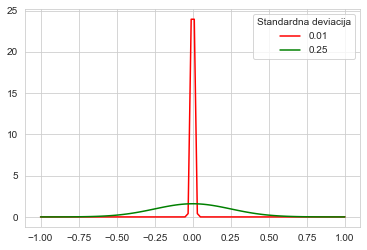

In [48]:
import scipy.stats as stats
mu, sigma_min, sigma_max = 0, 0.01, 0.25

x = np.linspace(-1 ,1, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma_min), label = sigma_min, color= "red")
plt.plot(x, stats.norm.pdf(x, mu, sigma_max), label = sigma_max, color = "green")
plt.legend(title = "Standardna deviacija")
plt.show()

In [11]:
for audio_index in range(1, 11):
    audio_ref_path = base_path + "00" + str(audio_index) + "_ref.wav"
    audio_ref, _ = librosa.load(audio_ref_path, sr=SAMPLE_RATE, mono=True)

    # generating random signal from reference signal
    t_duration_sec = random.randint(30, 90)
    t_duration_n = t_duration_sec * SAMPLE_RATE

    t_start_n = random.randint(0, (len(audio_ref) - t_duration_n))
    t_start_sec = lib.index_to_seconds(SAMPLE_RATE, audio_ref, t_start_n)

    audio = audio_ref[t_start_n: t_start_n + t_duration_n]

    # generating noise
    mu, sigma = 0, random.uniform(0.01, 0.25)
    noise = np.random.normal(mu, sigma, size=len(audio))
    test_signal = audio + noise

    # correlation without filter
    corr = lib.korelacija(audio_ref, test_signal)
    max_value = max(corr)[0]
    max_index = corr.index(max_value)

    cor_time_start = lib.index_to_seconds(
        SAMPLE_RATE, audio_ref, max_index)
    test_passed = t_start_n == max_index

    data = [
        audio_index,
        t_start_n,
        t_duration_n,
        t_start_sec,
        t_start_n,
        sigma,
        None,
        None,
        None,
        max_value,
        max_index,
        cor_time_start,
        corr[t_start_n][0],
        test_passed
    ]
    writer.writerow(data)
    print(audio_index, str(test_passed))

    filtered_audio = fil.butter_bandpass_filter(test_signal, 48, 52, SAMPLE_RATE, 6)

    # correlation with filter
    corr = lib.korelacija(audio_ref, test_signal)
    max_value = max(corr)[0]
    max_index = corr.index(max_value)

    cor_time_start = lib.index_to_seconds(
        SAMPLE_RATE, audio_ref, max_index)
    test_passed = t_start_n == max_index

    data = [
        audio_index,
        t_start_n,
        t_duration_n,
        t_start_sec,
        t_start_n,
        sigma,
        48,
        52,
        6,
        max_value,
        max_index,
        cor_time_start,
        corr[t_start_n][0],
        test_passed
    ]
    writer.writerow(data)
    print(audio_index, test_passed)


1 True
1 True
2 True
2 True
3 True
3 True
4 False
4 False
5 True
5 True
6 False
6 False
7 True
7 True
8 False
8 False
9 True
9 True
10 True
10 True


In [12]:
file.close()

### Zaključek poskusa

V poskusu smo analizirali korelacijo med testnim signalom ENF brez dodanega šuma in referenčnim signalom ENF. Testni signal je predstavljal 30 sekundni izsek daljšega referenčnega signala z odmikom 190 sekund.

Glede na neprisotnost šuma, smo pričakovali visoko korelacijo med testnim in referenčnim signalom. Najvišja pričakovana korelacija je bila enaka ena, izračunana med testnim signalom in referenčnim signalom v času `190 - 220s`.

Iz poskusa se je izkazalo, da je naša predpostavka bila pravilna.

Iz obeh poskusov lahko predpostavimo, da naša tehnika zaznave korelacije pravilno deluje. Zato s poskusi nadaljujemo.